# Health Care Fraud Detection 

## Part I. Exploratory Data Analysis 

In [18]:
from __future__ import print_function

import numpy as np
import pandas as pd

from datetime import datetime

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns


In [19]:
#df_ip = pd.read_pickle("./df_ip.pkl")
#df_op = pd.read_pickle("./df_op.pkl")

In [20]:
df_ip = pd.read_csv('../../../raw_data/Train_Inpatientdata-1542865627584.csv')

df_op = pd.read_csv('../../../raw_data/Train_Outpatientdata-1542865627584.csv')

df_p = pd.read_csv('../../../raw_data/Train_Beneficiarydata-1542865627584.csv')

flags = pd.read_csv('../../../raw_data/Train-1542865627584.csv')


In [21]:
df_op['InscClaimAmtReimbursed'].value_counts()

100       52943
10        42461
200       41594
60        40762
30        33919
40        33616
50        31293
20        27960
80        25095
70        24412
300       23803
90        20839
400       19917
0         19568
500       14238
600        8396
700        6444
3300       5374
800        5326
900        3886
1000       3671
1100       3043
1200       2207
1300       1876
1700       1833
1800       1818
1600       1801
2000       1725
1900       1705
1500       1696
          ...  
8900          1
14900         1
3380          1
970           1
2870          1
17200         1
6090          1
11200         1
3390          1
84460         1
12100         1
14020         1
10050         1
8080          1
10060         1
2480          1
8010          1
15800         1
1610          1
11080         1
1870          1
9300          1
1360          1
6070          1
102500        1
1110          1
8020          1
101250        1
5040          1
9600          1
Name: InscClaimAmtReimbu

In [22]:
# df_ip_test = pd.read_csv('Test_Inpatientdata-1542969243754.csv')

# df_op_test = pd.read_csv('Test_Outpatientdata-1542969243754.csv')

# df_p_test = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')

# test = pd.read_csv('Test-1542969243754.csv')

In [23]:
fmt = '%Y-%m-%d'

df_ip['ClaimStartDt'] = pd.to_datetime(df_ip['ClaimStartDt'], format = '%Y-%m-%d')
df_ip['ClaimEndDt'] = pd.to_datetime(df_ip['ClaimEndDt'], format = '%Y-%m-%d')

df_op['ClaimStartDt'] = pd.to_datetime(df_op['ClaimStartDt'], format = '%Y-%m-%d')
df_op['ClaimEndDt'] = pd.to_datetime(df_op['ClaimEndDt'], format = '%Y-%m-%d')

In [24]:
df_ip['Duration'] = df_ip['ClaimEndDt'] - df_ip['ClaimStartDt']

df_ip['Duration'] = df_ip['Duration']/np.timedelta64(1, 'D')

In [25]:
df_op['Duration'] = df_op['ClaimEndDt'] - df_op['ClaimStartDt']

df_op['Duration'] = df_op['Duration']/np.timedelta64(1, 'D')

We create two dataframes - for inpatients and outpatient beneficiaries, with added flags for each provider. 

In [26]:
df_ip_flags = pd.merge(df_ip, flags, on = 'Provider')
df_op_flags = pd.merge(df_op, flags, on = 'Provider')

In [27]:
df_ip_providers = df_ip_flags.groupby('Provider')

df_op_providers = df_op_flags.groupby('Provider')

In [28]:
df_ip_flags['Provider'].nunique()

2092

In [29]:
df_op_flags['Provider'].nunique()

5012

In [30]:
df_ip_flags['ip_op'] = 1
df_op_flags['ip_op'] = 0

From each of these dataframes, we make two separate dataframes, each containing only providers with or without potential fraud flag, respectively.

In [31]:
df_ip_fraud = df_ip_flags[df_ip_flags['PotentialFraud'] == 'Yes']
df_op_fraud = df_op_flags[df_op_flags['PotentialFraud'] == 'Yes']
df_ip_nfraud = df_ip_flags[df_ip_flags['PotentialFraud'] == 'No']
df_op_nfraud = df_op_flags[df_op_flags['PotentialFraud'] == 'No']

In [ ]:
df_ip_fraud['Provider'].nunique()

In [ ]:
df_ip_nfraud['Provider'].nunique()

In [ ]:
df_op_fraud['Provider'].nunique()

In [ ]:
df_op_nfraud['Provider'].nunique()

In [33]:
df_flags = flags.copy()

In [41]:
fraud = df_flags[df_flags['PotentialFraud'] == 'Yes']
nfraud = df_flags[df_flags['PotentialFraud'] == 'No']

In [42]:
fraud.shape

(506, 2)

In [ ]:
nfraud.shape

In [43]:
df_fraud = pd.concat([df_ip_fraud, df_op_fraud])
df_nfraud = pd.concat([df_ip_nfraud, df_op_nfraud])

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [44]:
df_fraud.head()

,AdmissionDt,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,...,DeductibleAmtPaid,DiagnosisGroupCode,DischargeDt,Duration,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,PotentialFraud,Provider,ip_op
0,2009-04-12,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,NaN,4019,...,1068.0,201,2009-04-18,6.0,26000,NaN,NaN,Yes,PRV55912,1
1,2009-01-20,PHY349293,BENE17521,2009-02-01,CLM34721,2009-01-20,45340,4240,NaN,2639,...,1068.0,987,2009-02-01,12.0,19000,PHY370861,PHY363291,Yes,PRV55912,1
2,2009-10-17,PHY334706,BENE21718,2009-11-04,CLM72336,2009-10-17,V5789,V5789,NaN,4168,...,1068.0,941,2009-11-04,18.0,17000,PHY334706,NaN,Yes,PRV55912,1
3,2009-10-25,PHY390614,BENE22934,2009-10-29,CLM73394,2009-10-25,71946,71535,NaN,71960,...,1068.0,506,2009-10-29,4.0,13000,PHY323689,PHY363291,Yes,PRV55912,1
4,2009-01-08,PHY380413,BENE24402,2009-01-12,CLM32911,2009-01-08,1748,2330,NaN,NaN,...,1068.0,593,2009-01-12,4.0,3000,PHY432598,NaN,Yes,PRV55912,1


In [39]:
df_fraud['Provider'].nunique()

506

In [38]:
df_nfraud['Provider'].nunique()

4904

### Total Revenue

In [45]:
df_fraud['TotalRev'] = df_fraud['InscClaimAmtReimbursed'] + df_fraud['DeductibleAmtPaid']


df_nfraud['TotalRev'] = df_nfraud['InscClaimAmtReimbursed'] + df_nfraud['DeductibleAmtPaid']

In [50]:
df_fraud.head()

,AdmissionDt,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,...,DiagnosisGroupCode,DischargeDt,Duration,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,PotentialFraud,Provider,ip_op,TotalRev
0,2009-04-12,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,NaN,4019,...,201,2009-04-18,6.0,26000,NaN,NaN,Yes,PRV55912,1,27068.0
1,2009-01-20,PHY349293,BENE17521,2009-02-01,CLM34721,2009-01-20,45340,4240,NaN,2639,...,987,2009-02-01,12.0,19000,PHY370861,PHY363291,Yes,PRV55912,1,20068.0
2,2009-10-17,PHY334706,BENE21718,2009-11-04,CLM72336,2009-10-17,V5789,V5789,NaN,4168,...,941,2009-11-04,18.0,17000,PHY334706,NaN,Yes,PRV55912,1,18068.0
3,2009-10-25,PHY390614,BENE22934,2009-10-29,CLM73394,2009-10-25,71946,71535,NaN,71960,...,506,2009-10-29,4.0,13000,PHY323689,PHY363291,Yes,PRV55912,1,14068.0
4,2009-01-08,PHY380413,BENE24402,2009-01-12,CLM32911,2009-01-08,1748,2330,NaN,NaN,...,593,2009-01-12,4.0,3000,PHY432598,NaN,Yes,PRV55912,1,4068.0


C:\Users\patri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\patri\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


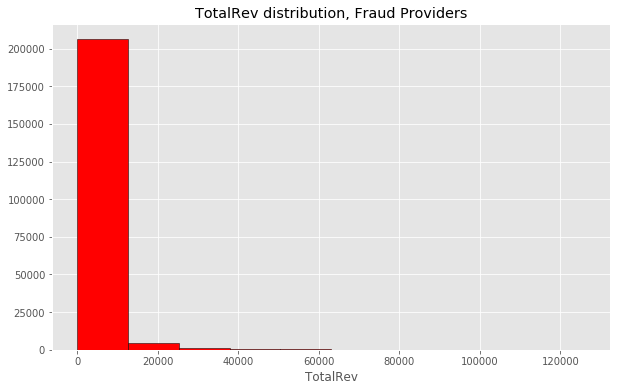

In [51]:
fig = plt.figure(figsize=(10,6))
plt.hist(df_fraud.TotalRev, facecolor = 'r', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, Fraud Providers')
plt.xlim()
plt.show()

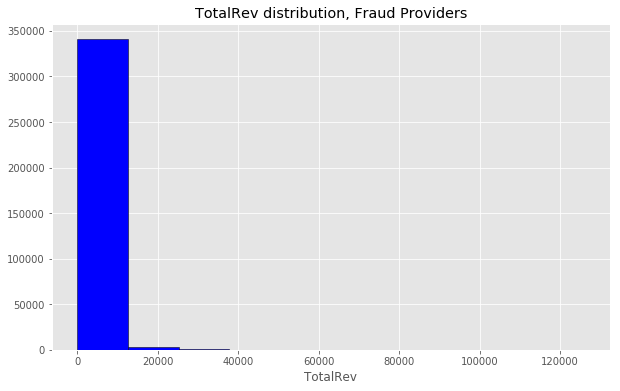

In [53]:
fig = plt.figure(figsize=(10,6))
plt.hist(df_nfraud.TotalRev, facecolor = 'b', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, Fraud Providers')
plt.show()

### Average Duration of Claims 

In [ ]:
AvgDur = df_fraud.groupby('Provider')['Duration'].mean()

AvgDur = AvgDur.to_frame()

fraud = pd.merge(fraud, AvgDur, on = 'Provider')

In [13]:
fraud.head()

NameError: name 'fraud' is not defined

In [ ]:
AvgDur = df_nfraud.groupby('Provider')['Duration'].mean()

AvgDur = AvgDur.to_frame()

nfraud = pd.merge(nfraud, AvgDur, on = 'Provider')

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.Duration, facecolor = 'r', edgecolor = 'k')
plt.xlabel('AvgDuration')
plt.title('AvgDuration distribution, Fraud Providers')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.Duration, facecolor = 'b', edgecolor = 'k')
plt.xlabel('AvgDuration')
plt.title('AvgDuration distribution, No Fraud Providers')
plt.show()

### Number of Claims per Patient

The type of healthcare insurance fraud called 'unbundling' or 'fragmenting' could be detected if we analyse the number of claims per patient, for each provider. Fraudulent providers would increase their profits by billing the procedures separately (unbundling), thus creating a higher number of claims per patient. 

In [ ]:
NumOfPt = df_fraud.groupby('Provider')['BeneID'].nunique()

NumOfPt = NumOfPt.to_frame()

fraud = pd.merge(fraud, NumOfPt, on = 'Provider')

In [ ]:
fraud.columns

In [ ]:
NumOfPt = df_nfraud.groupby('Provider')['BeneID'].nunique()

NumOfPt = NumOfPt.to_frame()

nfraud = pd.merge(nfraud, NumOfPt, on = 'Provider')

In [ ]:
NumOfClm = df_fraud.groupby('Provider')['ClaimID'].count()

NumOfClm = NumOfClm.to_frame()

fraud = pd.merge(fraud, NumOfClm, on = 'Provider')

fraud.rename({'ClaimID': 'NumOfClm', 'BeneID': 'NumOfPt','Duration': 'AvgDuration'}, axis = 1,\
            inplace = True)

In [ ]:
NumOfClm = df_nfraud.groupby('Provider')['ClaimID'].count()

NumOfClm = NumOfClm.to_frame()

nfraud = pd.merge(nfraud, NumOfClm, on = 'Provider')

nfraud.rename({'ClaimID': 'NumOfClm', 'BeneID': 'NumOfPt', 'Duration': 'AvgDuration'}, axis = 1,\
            inplace = True)

In [ ]:
nfraud.columns

In [ ]:
fraud['ClmPerPt'] = fraud['NumOfClm']/fraud['NumOfPt']

In [ ]:
nfraud['ClmPerPt'] = nfraud['NumOfClm']/nfraud['NumOfPt']

In [ ]:
fraud.head()

In [ ]:
nfraud.head()

In [ ]:
#fraud.rename({'Duration': 'AvgDuration', 'BeneID_y': 'NumOfPt'}, axis = 1,\
#            inplace = True)

In [ ]:
fraud['AvgDuration'] = fraud['AvgDuration'].round(2)
fraud['ClmPerPt'] = fraud['ClmPerPt'].round(2)

nfraud['AvgDuration'] = nfraud['AvgDuration'].round(2)
nfraud['ClmPerPt'] = nfraud['ClmPerPt'].round(2)

In [ ]:
fraud.head()

In [ ]:
nfraud.head()

In [ ]:
fig = plt.figure(figsize=(10,6))

plt.subplot(1,1,1)

plt.hist(fraud.ClmPerPt, facecolor = 'r', edgecolor = 'k')
plt.xlabel('ClmPerPt')
plt.title('ClmPerPt distribution, Potential Fraud Providers')
plt.show()

fig = plt.figure(figsize=(10,6))

plt.subplot(1,1,1)

plt.hist(nfraud.ClmPerPt, facecolor = 'b', edgecolor = 'k')
plt.xlabel('ClmPerPt')
plt.title('ClmPerPt distribution, No Fraud Providers')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.ClmPerPt, facecolor = 'b', edgecolor = 'k')
plt.xlabel('ClmPerPt')
plt.title('ClmPerPt distribution, No Fraud Providers')
plt.show()

### Number of Claims 

In [14]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.NumOfClm, facecolor = 'r', edgecolor = 'k')
plt.xlabel('NumOfClm')
plt.title('NumOfClm distribution, Potential Fraud Providers')
plt.show()

NameError: name 'fraud' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.NumOfClm, facecolor = 'b', edgecolor = 'k')
plt.xlabel('NumOfClm')
plt.title('NumOfClm distribution, No Fraud Providers')
plt.show()

### Revenue Per Patient

The type of fraud called 'upcoding' could be detected if we look at how much the providers receive per patient. Noticable difference between potential fraudsters and non fraudsters would indicate that a provider send medical bills that are more expensive than they should have been based on the services they performed. 

In [ ]:
TotalRev = df_fraud.groupby('Provider')['TotalRev'].agg('sum')

TotalRev = TotalRev.to_frame()

fraud = pd.merge(fraud, TotalRev, on = 'Provider')

#fraud.rename({'TotalClaim': 'TotalRev'}, axis = 1, inplace = True)

In [ ]:
fraud.columns

In [ ]:
TotalRev = df_nfraud.groupby('Provider')['TotalRev'].agg('sum')

TotalRev = TotalRev.to_frame()

nfraud = pd.merge(nfraud, TotalRev, on = 'Provider')

#nfraud.rename({'TotalClaim': 'TotalRev'}, axis = 1, inplace = True)

In [ ]:
nfraud.head()

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.TotalRev, facecolor = 'r', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, Potential Fraud Providers')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.TotalRev, range = [0, 650000],facecolor = 'b', edgecolor = 'k')
plt.xlabel('TotalRev')
plt.title('TotalRev distribution, No Fraud Providers')
plt.show()

In [ ]:
fraud['RevPerPt'] = fraud['TotalRev']/fraud['NumOfPt']
nfraud['RevPerPt'] = nfraud['TotalRev']/nfraud['NumOfPt']

In [ ]:
nfraud.head()

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(fraud.RevPerPt, facecolor = 'r', edgecolor = 'k')
plt.xlabel('RevPerPt')
plt.title('RevPerPt distribution, Potential Fraud Providers')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(nfraud.RevPerPt, range = (0, 35000),facecolor = 'b', edgecolor = 'k')
plt.xlabel('RevPerPt')
plt.title('RevPerPt distribution, Non Fraud Providers')
plt.show()

In [ ]:
fraud['RevPerPt'] = fraud['RevPerPt'].round(2)

nfraud['RevPerPt'] = nfraud['RevPerPt'].round(2)

fraud['TotalRev'] = fraud['TotalRev'].round(0).astype(int)

nfraud['TotalRev'] = nfraud['TotalRev'].round(0).astype(int)

In [ ]:
fraud.head()

In [ ]:
nfraud.head()

### Number of Claims with No Attending Physician

In [ ]:
NoPhy = df_fraud.AttendingPhysician.isnull().groupby(df_fraud['Provider']).sum().astype(int).reset_index(name = 'count')

In [ ]:
NoPhy['count'].describe()

## Number of Physicians Per Claim

In [ ]:
df_phy_fraud = df_fraud[['AttendingPhysician', 'OperatingPhysician', \
                    'OtherPhysician']]

df_phy_nfraud = df_nfraud[['AttendingPhysician', 'OperatingPhysician', \
                    'OtherPhysician']]

In [ ]:
(df_phy_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_fraud)

In [ ]:
(df_phy_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_nfraud)

Percentage of fraud and no fraud providers, with the physicians on their claims:

In [15]:
100 - (df_phy_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_fraud)

NameError: name 'df_phy_fraud' is not defined

In [ ]:
100 - (df_phy_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_phy_nfraud)

## Number of Procedure Codes per Patient

In [ ]:
df_num_procedure_fraud = df_fraud[['ClmProcedureCode_1', \
                'ClmProcedureCode_2','ClmProcedureCode_3', \
                    'ClmProcedureCode_4', 'ClmProcedureCode_5',\
                                  'ClmProcedureCode_6']]

df_num_procedure_nfraud = df_nfraud[['ClmProcedureCode_1', \
                'ClmProcedureCode_2','ClmProcedureCode_3', \
                    'ClmProcedureCode_4', 'ClmProcedureCode_5',\
                                  'ClmProcedureCode_6']]

In [ ]:
(df_num_procedure_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_fraud)

In [ ]:
(df_num_procedure_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_nfraud)

Percentage of fraud and no fraud providers that use procedure codes on their claims:

In [ ]:
100 - (df_num_procedure_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_fraud)

In [ ]:
100 - (df_num_procedure_nfraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_procedure_nfraud)

In [ ]:
#df_fraud['num_nonanproc_codes'] =  df_fraud['ClmProcedureCode_1'].isnull()

## Number of Diagnosis Codes Per Patient

In [ ]:
df_num_diag_fraud = df_fraud[['ClmDiagnosisCode_1', \
                'ClmDiagnosisCode_2','ClmDiagnosisCode_3', \
                    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',\
                                  'ClmDiagnosisCode_6',\
                      'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',\
                                  'ClmDiagnosisCode_9',\
                             'ClmDiagnosisCode_10']]

In [ ]:
df_num_diag_nfraud = df_nfraud[['ClmDiagnosisCode_1', \
                'ClmDiagnosisCode_2','ClmDiagnosisCode_3', \
                    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',\
                                  'ClmDiagnosisCode_6',\
                      'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',\
                                  'ClmDiagnosisCode_9',\
                             'ClmDiagnosisCode_10']]

In [ ]:
(df_num_diag_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_diag_fraud)

In [ ]:
(df_num_diag_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_diag_nfraud)

In [ ]:
100 - (df_num_diag_fraud.isnull().sum().sort_values(ascending = True))*100/len(df_num_diag_fraud)

In [ ]:
100 - (df_num_diag_fraud.isnull().sum().sort_values(ascending = False))*100/len(df_num_diag_nfraud)

# States

In [ ]:
df_loc_fraud = pd.merge(df_fraud, df_p, on = 'BeneID')

df_loc_nfraud = pd.merge(df_nfraud, df_p, on = 'BeneID')

In [ ]:
fraud_states = df_loc_fraud['State'].unique()
print (sorted(fraud_states))

In [ ]:
nfraud_states = df_loc_nfraud['State'].unique()
print (sorted(nfraud_states))

In [ ]:
df_loc_nfraud['State'].mode()

In [ ]:
df_loc_fraud['County'].nunique()

In [ ]:
df_loc_nfraud['County'].nunique()

In [ ]:
fig = plt.figure(figsize=(18,12))
df_loc_fraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'r', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Number of Claims by States, Fraud Providers')
plt.show()

In [16]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Number of Claims by States, No Fraud Providers')
plt.show()

NameError: name 'df_loc_nfraud' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10,6))
df_loc_fraud.groupby('State')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'r', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Highest Number of Claims, Fraud Providers')
plt.show()

State Codes:
* 05 - California
* 10 - Florida
* 33 - New York
* 39 - Pennsylvania
* 45 - Texas
* 31 - New Jersey
* 49 - Virginia
* 23 - Michigan
* 14 - Illinois
* 22 - Massachusetts

In [ ]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Highest Number of Claims, No Fraud Providers')
plt.show()

State Codes:
* 45 - Texas
* 10 - Florida
* 5  - California
* 33 - New York
* 14 - Illinois
* 36 - Ohio
* 34 - Oklahoma
* 11 - Georgia
* 23 - Michigan
* 39 - Pennsylvania
    

In [ ]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Lowest Number of Claims, No Fraud Providers')
plt.show()

State Codes
* 9 - District of Columbia
* 2 - Alaska
* 53 - Wyoming
* 35 - North Dakota
* 8 - Delaware
* 41 - Rhode Island
* 46 - Utah
* 12 - Hawaii
* 27 - Montana
* 47 - Vermont


## Counties 

In [ ]:
#fig = plt.figure(figsize=(18,12))
#df_loc_fraud.groupby('County')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'r', edgecolor = 'k')

#plt.ylabel('County Code')
#plt.title('Number of Claims by Counties, Fraud Providers')
#plt.show()

In [ ]:
#fig = plt.figure(figsize=(10,6))
#df_loc_nfraud.groupby('County')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'b', edgecolor = 'k')

#plt.ylabel('County Code')
#plt.title('Number of Claims by Counties, No Fraud Providers')
#plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
df_loc_fraud.groupby('County')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'r', edgecolor = 'k')

plt.ylabel('County Code')
plt.title('Number of Claims by Counties, Fraud Providers')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('County')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('County Code')
plt.title('Number of Claims by Counties, No Fraud Providers')
plt.show()

In [ ]:
df = pd.concat([df_ip_flags, df_op_flags])

In [ ]:
#df['ip_op'] = df.PotentialFraud.apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df.shape

In [ ]:
df_unsup = pd.concat([fraud, nfraud])

In [ ]:
df = df_unsup.copy()

In [ ]:
df.to_pickle("./df.pkl")

In [ ]:
df.to_csv('data.csv')

In [ ]:
df.head()

In [ ]:
df_clm = df[['Provider', 'PotentialFraud', 'TotalRev']]

In [ ]:
df_clm['TotalRev'].describe()